In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.preprocessing import normalize, scale, Normalizer, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.feature_extraction.text import CountVectorizer

import numpy as np
import pandas as pd
import pickle 
import os, re
from PIL import Image
import pathlib
import csv
import urllib

from sklearn import datasets

# pip install git+git://github.com/mgelbart/plot-classifier.git
from plot_classifier import plot_classifier

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option("display.max_colwidth", 200)

import altair as alt

# pip install ipython-autotime
import autotime

In [2]:
# Read IMDB movie reviews into a pandas DataFrame
imdb_df = pd.read_csv('data/imdb_master.csv', encoding = "ISO-8859-1")
# Only keep the reviews with pos and neg labels
imdb_df = imdb_df[imdb_df['label'].str.startswith(('pos','neg'))]
imdb_df.head(4)

,Unnamed: 0,type,review,label,file
0,0,test,"Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the charact...",neg,0_2.txt
1,1,test,"This is an example of why the majority of action films are the same. Generic and boring, there's really nothing worth watching here. A complete waste of the then barely-tapped talents of Ice-T and...",neg,10000_4.txt
2,2,test,"First of all I hate those moronic rappers, who could'nt act if they had a gun pressed against their foreheads. All they do is curse and shoot each other and acting like clichÃ©'e version of gangst...",neg,10001_1.txt
3,3,test,"Not even the Beatles could write songs everyone liked, and although Walter Hill is no mop-top he's second to none when it comes to thought provoking action movies. The nineties came and social pla...",neg,10002_3.txt


### Logistic Regression 

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(imdb_df['review'], 
                                                                        imdb_df['label'], 
                                                                        test_size = 0.20, 
                                                                        random_state = 12)
vec = CountVectorizer(max_features=5000,                       
                      stop_words='english')

X_train_counts = vec.fit_transform(X_train) 
  
X_test_counts = vec.transform(X_valid)

In [4]:
lr = LogisticRegression()
lr.fit(X_train_counts, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
vocab = vec.get_feature_names()
weights = lr.coef_.flatten()

inds = np.argsort(lr.coef_.flatten())

negative_words = [vocab[index] for index in inds[:10]]

neg_words_weights = [(weights[index]) for index in inds[:10]]

results = pd.DataFrame({'Neg Words':negative_words, 'Weights':neg_words_weights})

results.to_csv(r'table\negative.csv')

In [6]:
results

,Neg Words,Weights
0,waste,-2.250113
1,disappointment,-2.175797
2,mst3k,-2.171390
3,mildly,-1.952146
4,forgettable,-1.908331
5,laughable,-1.896478
6,uninspired,-1.881927
7,lousy,-1.820625
8,redeeming,-1.773734
9,worst,-1.749149


### Exploritory analysis 

In [7]:
mst3k_df = imdb_df[imdb_df['review'].str.contains("MST3K")]

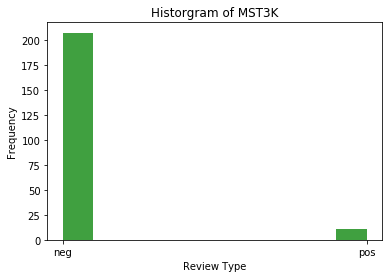

In [8]:
plt.hist(mst3k_df["label"], facecolor='g', alpha=0.75)

plt.xlabel("Review Type")
plt.title("Historgram of MST3K")
plt.ylabel("Frequency")
plt.savefig("img/hist.png")

In [9]:
mst3k_df[80:90]

,Unnamed: 0,type,review,label,file
9989,9989,test,"I watched the MST3K version of the movie, and this review includes minor spoilers.<br /><br />When I started watching this movie, it looked like it might have promise as a cheesy sci-fi flick, but...",neg,7741_4.txt
9990,9990,test,"Boy, this movie is bad. And not in a good, cheesy, fun way, either. Even MST3K couldn't stop it from being boring, and it's also confusing as all get out. But the most annoying part of this dull m...",neg,7742_1.txt
9991,9991,test,"And the title says it all: a cheesy sounding title that is a cheesy sounding joke of a film known as ""Alien from L.A."" Why not just call it ""Alien from South Africa,"" as this is the place where th...",neg,7743_1.txt
9993,9993,test,"In 1990 I saw Kathy Ireland in person - I was at UNT in Denton during the filming of ""Necessary Roughness."" Strangely enough, the voice she's using in this film isn't too far off from her real spe...",neg,7745_1.txt
10440,10440,test,"Admittedly, I watched the MST3K version of this, but it's not actually too bad outright, at least compared to others which deserve my cinematic hatred.<br /><br />The story centers around a troubl...",neg,8147_4.txt
10764,10764,test,"I picked up this DVD for $4.99. They had put spiffy cover art on the package, along with a plot summary that had nothing to do with the movie. The acting is terrible, and the writing is worse. The...",neg,8439_1.txt
11081,11081,test,"This is the ""Battlefield Earth"" of mini series. It has with a few exceptions, all the disastrous ingredients that doomed that movie and will follow it to the grave in the turkey cemetery. They are...",neg,8724_1.txt
11103,11103,test,"This joins the endless line of corny, predictable 50's sci-fi shlock out there. As usual, it's pretty bad. There isn't much of a plot that I could detect and the over-exaggeration of the leads onl...",neg,8744_2.txt
11104,11104,test,"I suppose you could say this film has a grain of potential, but nothing more, because boy did the filmmakers botch it. The plot is practically incomprehensible, the pacing is lethargic and the act...",neg,8745_2.txt
11105,11105,test,"As a kid, this movie scared me green. As an adult, I couldn't stop laughing.<br /><br />I have not had the pleasure of watching this movie via MST3K. I caught it, instead, on a late Saturday after...",neg,8746_4.txt


### Reviews some of the movies

In [10]:
results = {
"Movie" : ["Darkhunters", "Galaxina", "Manos: The Hands of Fate", "Soultaker", "Robot Holocaust", "Rocketship X-M", "Steel Frontier", "The Clonus Horror", "Alien from L.A."],
"Year" : [2004, 1980, 1966, 1990, 1987, 1950, 1995, 1979, 1988],
"Review Score" : [2.2, 3.7, 1.9, 2.3, 2.2, 4.9, 4.8, 3.8, 2.9]
}

results_df = pd.DataFrame(results)


In [11]:
results_df

,Movie,Year,Review Score
0,Darkhunters,2004,2.2
1,Galaxina,1980,3.7
2,Manos: The Hands of Fate,1966,1.9
3,Soultaker,1990,2.3
4,Robot Holocaust,1987,2.2
5,Rocketship X-M,1950,4.9
6,Steel Frontier,1995,4.8
7,The Clonus Horror,1979,3.8
8,Alien from L.A.,1988,2.9


### Some Reviews 

In [12]:
imdb_df["review"].loc[6595]

'You know the story of "Sweeney Todd" now, most likely thanks to Tim Burton\'s recent movie. You probably don\'t know it though, from this take on the old tale from Andy Milligan-that notorious sleaze merchant that gave Al Adamson and Ted V. Mikels a run for their money.<br /><br />It had to happen eventually. In my years of watching horror and exploitation from the 60\'s to the 80\'s, I\'m finally reviewing an Andy Milligan movie. You see, from 1964 to 1990, Andy gave us many an exploitation and horror movie-none of which was any good, and barely watchable. "The Bloodthirsty Butchers" is no exception.<br /><br />There is dialog and well, there is talk, and that\'s one of the things you will find here-lots and lots of talk. The movie reaches almost "Manos The Hands of Fate" levels at times, as you wait tirelessly for something to happen. While I love cheap looking gore effects, the violence is too few and far between, and in spite of it\'s reputation, the "breast" scene isn\'t that sho

In [13]:
imdb_df["review"].loc[29812]

"Good grief! While I still maintain that Manos: The Hands of Fate is the worst piece of mental torture available, Hobgoblins came awfully close. This...this...thing insults the audience at every opportunity.<br /><br />At least films like Space Mutiny and Future War can be enjoyed on mst3k, this one was a struggle to get through. I was literally writhing on the couch in anguish. This thing managed to embarrass me - alone!<br /><br />Even if you are a die-hard MST3K fan and have made it your mission to see every single experiment, think twice about seeing this one.<br /><br />It's that bad."

In [14]:
imdb_df["review"].loc[134]

'This movie really is that bad, and I\'m normally a sucker for bad movies, but this was too much. Seeing this is like OD\'ing on pure SUCK. Now, you may think you\'ve seen the bottom of the barrel. You may have waded through every title from Full Moon and Troma, all the movies of Edward D. Wood Jr, Uwe Boll, Albert Pyun and direct to DVD-flicks from faded men-of-action. You may even have seen Death Tunnel, Ghost Lake and a vast array of the movies that MST3K covered, but in their original form. But you do not know truly awful film-making until you have seen Darkhunters. And if you haven\'t, you shouldn\'t. Don\'t bother. Not only is this movie amazingly poorly written, directed, shot, edited, acted and splattered in crude, cheap aftereffects. First of all, it\'s a pretentious mess. But not good, Greenaway or Lynch-style pretentious or hilariously messy in an Ittenbach or early Waters sort of fashion. It\'s the kind of pretentiousness that comes when someone incredibly stupid thinks the

In [15]:
imdb_df["review"].loc[882]

"I have seen both the MST3K version and the uncut version. I rather enjoyed it. Either way, it wasn't that bad of a movie. Sure it moved a bit slow at times. I liked it.<br /><br />As far as MST3K goes, they only did the movies they could get the rights for. Not all the movies they ripped apart where bad movies, it was just so easy to make fun of them. Take SoulTaker for example.<br /><br />Joe Estevez and Robert Z'Dar's characters where so inanimate and boringly silly I couldn't help but laugh. I couldn't take them seriously. It really created a unique feeling though.<br /><br />Vivian Schilling did an excellent job with the script. A world better than 95% of the garbage in the theatres today. Her role was played well. Not too screamy not to masculine but just right. The camera really likes her in this movie. I would have casted her in that role after ready the script.<br /><br />Anyways, this movie deserves a bit more credit than it is given. Please watch the uncut version if you see

In [16]:
imdb_df["review"].loc[883]

"First of all, since I'm one of the people who never saw the MST3K chopped up version of this movie, I can't comment on that.<br /><br />However, I DID see the original version of this movie on the Sci-Fi Channel and I thought it was just as good as anything else on that Channel. In fact, I thought it was one of their better offerings.<br /><br />I've noticed in perusing the comments here that the people who write in detail about SOULTAKER with a modicum of intelligence, thoughtfulness and maturity tend to like at least a FEW things about this movie and rightly so. In it's original cut, most reasonable people I think would probably rate it at least 4 or 5 stars out of 10. Five is average to me and I think this movie is about average for a Sci Fi pic.<br /><br />In contrast to the above, I've also noticed that the reviewers who seem immature, dull and flip and as a result come off as boneheads from where I stand, are the same ones who can't find anything good about this movie and basica

In [17]:
imdb_df["review"].loc[1734]

'Robot Holocaust is about the lamest, most pathetic attempt at making a post-apocalyptic movie that I\'ve seen. And I thought the Italians were the masters of wretched Mad Max wannabes. Some of those movies like Escape 2000 are positively brilliant in comparison with this piece of poo. The plot is nonsensical Â? even with a narrator setting up every scene. And boy does it drag. Scene after scene with nothing of any interest happening. The special effects (and I use the word "special" loosely) consist of sock puppets. Yes, that\'s right Â? sock puppets! The acting is abysmal. Angelika Jager is in the running for worst performance I\'ve ever seen. Sure, she\'s French or German or whatever Â? but man is she bad. I cannot think of a single positive thing to say about the movie. So I\'ll stop there because ten sentences on this junk is about ten too many.<br /><br />However, and fortunately for me, I saw the MST3K version of Robot Holocaust. Some of the things that made the movie so bad hel

In [18]:
imdb_df["review"].loc[5566]

'To call "Rocketship X-M" a science fiction classic is due more to its release date (1950), its savvy ability to capitalize on the publicity for "Destination Moon", and the appearance of actors who would later star in television as Sea Hunt\'s Mike Nelson, Rockford\'s dad and Wyatt Earp.<br /><br />The movie itself is bad enough to be good fodder for MST3K and is best viewed with commentary from Joel and the robots. This is the type of movie best suited to added riffing from the MST3K characters; something preachy, slow-paced, poorly scripted, and full of painfully bad acting. While unintentionally funny stuff like "Plan 9 From Outer Space" don\'t lend themselves to satirical commentary (because the movie constantly upstages the hosts), really bad and dull movies like "Rocketship X-M" are ideal. So add some stars to the rating if you are watching the MST3K version.<br /><br />The basic story has the crew taking an unplanned right turn at the moon and ending up on Mars. What they find o

### N-grams 

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(imdb_df['review'], 
                                                                        imdb_df['label'], 
                                                                        test_size = 0.20, 
                                                                        random_state = 12)
vec = CountVectorizer(max_features=5000, 
                      ngram_range= (2,2),
                      stop_words='english')

X_train_counts = vec.fit_transform(X_train) 
  
X_test_counts = vec.transform(X_valid)

In [20]:
lr = LogisticRegression()
lr.fit(X_train_counts, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
vocab = vec.get_feature_names()
weights = lr.coef_.flatten()

inds = np.argsort(lr.coef_.flatten())

negative_words = [vocab[index] for index in inds[:10]]

neg_words_weights = [(weights[index]) for index in inds[:10]]

results = pd.DataFrame({'Neg Words':negative_words, 'Weights':neg_words_weights})

results.to_csv(r'table\negative_ngrams.csv')

In [22]:
results

,Neg Words,Weights
0,worst films,-3.050785
1,disappointing film,-2.713587
2,save movie,-2.650080
3,worst movies,-2.638325
4,terrible film,-2.500183
5,worst ve,-2.491900
6,terrible movie,-2.487360
7,worst movie,-2.472387
8,just awful,-2.407856
9,poor script,-2.312758
